## Question1
#### How has the crops/livestock primary production developed since 1960?

In this notebook we examine how production of lifestock and crops has developed. To do this we need the cleaned data for lifestock/crops, as well as population data for countries.  
To start out we will look at bigger areas, and then might look at it on country level afterwards.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
meat_cont = pd.read_csv('./data/csv/meat_continents.csv')
pop_cont = pd.read_csv('./data/csv/pop_continents.csv')

In [3]:
data = meat_cont.merge(pop_cont, on = ['Area','Year', 'Area Code'])

In [4]:
drop_col = ['Unnamed: 0_x', 'Unnamed: 0_y']
data.drop(drop_col, axis = 1, inplace = True)

In [5]:
# Rename the columns
new_names = {'Unit_x': 'Unit', 'Value_x': 'Value', 'Value_y': 'Population'}
data.rename(columns = new_names, inplace = True)
data

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Value,Flag,Unit_y,Population
0,5100,Africa,1122,"Meat indigenous, ass",5510,Production,tonnes,1961,4150.0,A,1000 persons,290214.489
1,5100,Africa,1084,"Meat indigenous, bird nes",5510,Production,tonnes,1961,5400.0,A,1000 persons,290214.489
2,5100,Africa,972,"Meat indigenous, buffalo",5510,Production,tonnes,1961,NaN,A,1000 persons,290214.489
3,5100,Africa,1137,"Meat indigenous, camel",5510,Production,tonnes,1961,86018.0,A,1000 persons,290214.489
4,5100,Africa,944,"Meat indigenous, cattle",5510,Production,tonnes,1961,1796412.0,A,1000 persons,290214.489
...,...,...,...,...,...,...,...,...,...,...,...,...
10436,5500,Oceania,1775,"Meat indigenous, poultry",5510,Production,tonnes,2013,1298930.0,A,1000 persons,38695.761
10437,5500,Oceania,1770,"Meat indigenous, total",5510,Production,tonnes,2013,6497829.0,A,1000 persons,38695.761
10438,5500,Oceania,1808,"Meat, Poultry",5510,Production,tonnes,2013,1301703.0,A,1000 persons,38695.761
10439,5500,Oceania,1765,"Meat, Total",5510,Production,tonnes,2013,6426310.0,A,1000 persons,38695.761


In [6]:
##crops_cont = pd.read_pickle('./data/pickles/crops_continents.pkl')

In [36]:
data['Relative Production'] = data['Value']/data['Population']
data.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Value,Flag,Unit_y,Population,Relative Production
0,5100,Africa,1122,"Meat indigenous, ass",5510,Production,tonnes,1961,4150.0,A,1000 persons,290214.489,0.014300
1,5100,Africa,1084,"Meat indigenous, bird nes",5510,Production,tonnes,1961,5400.0,A,1000 persons,290214.489,0.018607
2,5100,Africa,972,"Meat indigenous, buffalo",5510,Production,tonnes,1961,NaN,A,1000 persons,290214.489,NaN


In [33]:
from imp import reload
import scripts.visualization
reload(scripts.visualization)
from scripts.visualization import *


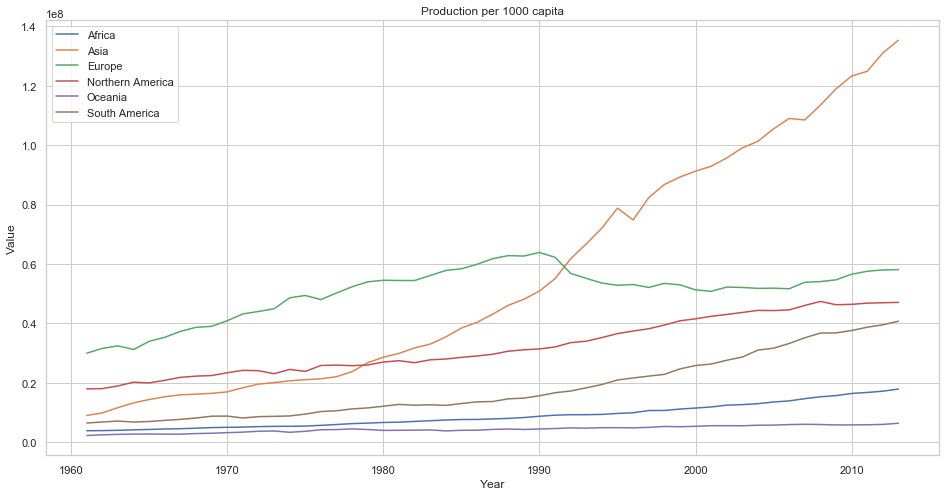

In [35]:
plot_compare_areas(data[(data['Item'] == 'Meat, Total')], y = 'Value', title='Production per 1000 capita')

In [ ]:
import folium
